In [21]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables

In [34]:
df = pd.read_csv("archive/35_Human_rights_violation_by_police.csv")

In [23]:
df.shape

(2267, 7)

In [24]:

df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0


In [25]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted'],
      dtype='object')

In [30]:
df[df.isnull().any(axis=1)]

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
12,Madhya Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,2.0,2.0,NaN
17,Uttar Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,1.0,1.0,NaN
36,Rajasthan,2002,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,NaN,NaN
37,Tamil Nadu,2002,HR_Disappearance of Persons,01. Disappearance of Persons,3.0,3.0,NaN
63,Jammu & Kashmir,2004,HR_Disappearance of Persons,01. Disappearance of Persons,1.0,NaN,NaN
...,...,...,...,...,...,...,...
2234,Delhi,2009,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),4.0,4.0,NaN
2240,Kerala,2009,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),1.0,1.0,NaN
2250,Assam,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),5.0,NaN,NaN
2253,Goa,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),1.0,NaN,NaN


In [27]:
df.nunique(axis=0)

Area_Name                                         31
Year                                              10
Group_Name                                        12
Sub_Group_Name                                    12
Cases_Registered_under_Human_Rights_Violations    35
Policemen_Chargesheeted                           22
Policemen_Convicted                                9
dtype: int64

In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
count,2267.000000,2265.000000,2213.000000,2163.000000
mean,2005.413763,0.896247,0.394035,0.075821
std,2.801139,6.742049,2.640141,1.530082
min,2001.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000
50%,2005.000000,0.000000,0.000000,0.000000
75%,2008.000000,0.000000,0.000000,0.000000
max,2010.000000,233.000000,67.000000,54.000000


In [ ]:
df.Group_Name.unique()


array(['HR_Disappearance of Persons', 'HR_Illegal detention/arrests',
       'HR_Fake encounter killings',
       'HR_Violation against Terrorists/Extremists', 'HR_Extortion',
       'HR_Torture', 'HR_False implication',
       'HR_Failure in taking action', 'HR_Indignity to Women',
       'HR_Atrocities on SC/ST', 'HR_Others Violations by Police',
       'HR_Total Violations by Police'], dtype=object)

In [35]:
df=df.dropna()

In [36]:
df[df.isnull().any(axis=1)]

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted


In [38]:
from scipy import stats

In [41]:
z_scores = stats.zscore(df['Policemen_Chargesheeted'])
# Define a threshold for considering data points as outliers
threshold = 3

# Filter out rows with z-scores greater than the threshold
outlier_indices = abs(z_scores) > threshold
df[outlier_indices]

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
1671,Andhra Pradesh,2001,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,22.0,14.0,2.0
1711,Andhra Pradesh,2003,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,19.0,8.0,0.0
1794,Gujarat,2007,HR_Atrocities on SC/ST,10. Atrocities on SC/ST,10.0,10.0,0.0
1859,Andhra Pradesh,2001,HR_Others Violations by Police,11. Others,18.0,12.0,0.0
1865,Gujarat,2001,HR_Others Violations by Police,11. Others,12.0,8.0,0.0
1885,Gujarat,2002,HR_Others Violations by Police,11. Others,14.0,12.0,0.0
1942,Gujarat,2005,HR_Others Violations by Police,11. Others,11.0,10.0,0.0
1965,Gujarat,2006,HR_Others Violations by Police,11. Others,14.0,12.0,0.0
1985,Gujarat,2007,HR_Others Violations by Police,11. Others,10.0,9.0,0.0
2024,Chhattisgarh,2009,HR_Others Violations by Police,11. Others,51.0,51.0,43.0


C:\Users\Akshay\AppData\Local\Temp\ipykernel_35348\3334069724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<Axes: >

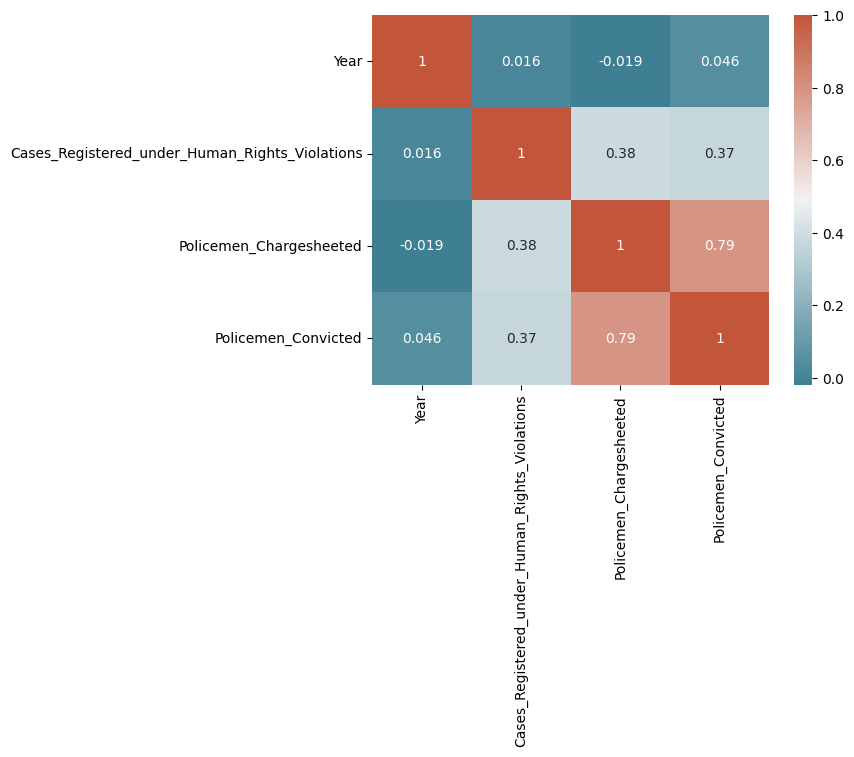

In [42]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: xlabel='Year', ylabel='Policemen_Chargesheeted'>

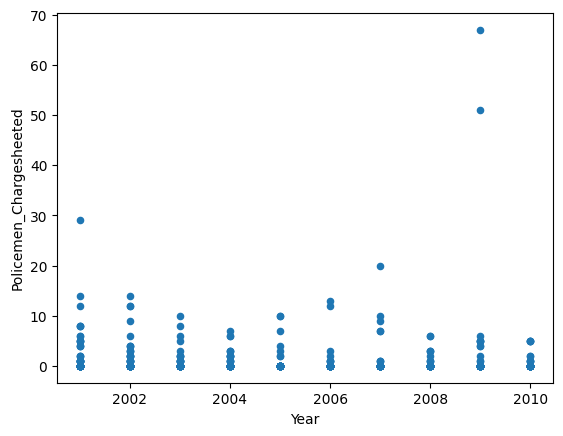

In [44]:
df.plot( x='Year', y='Policemen_Chargesheeted')

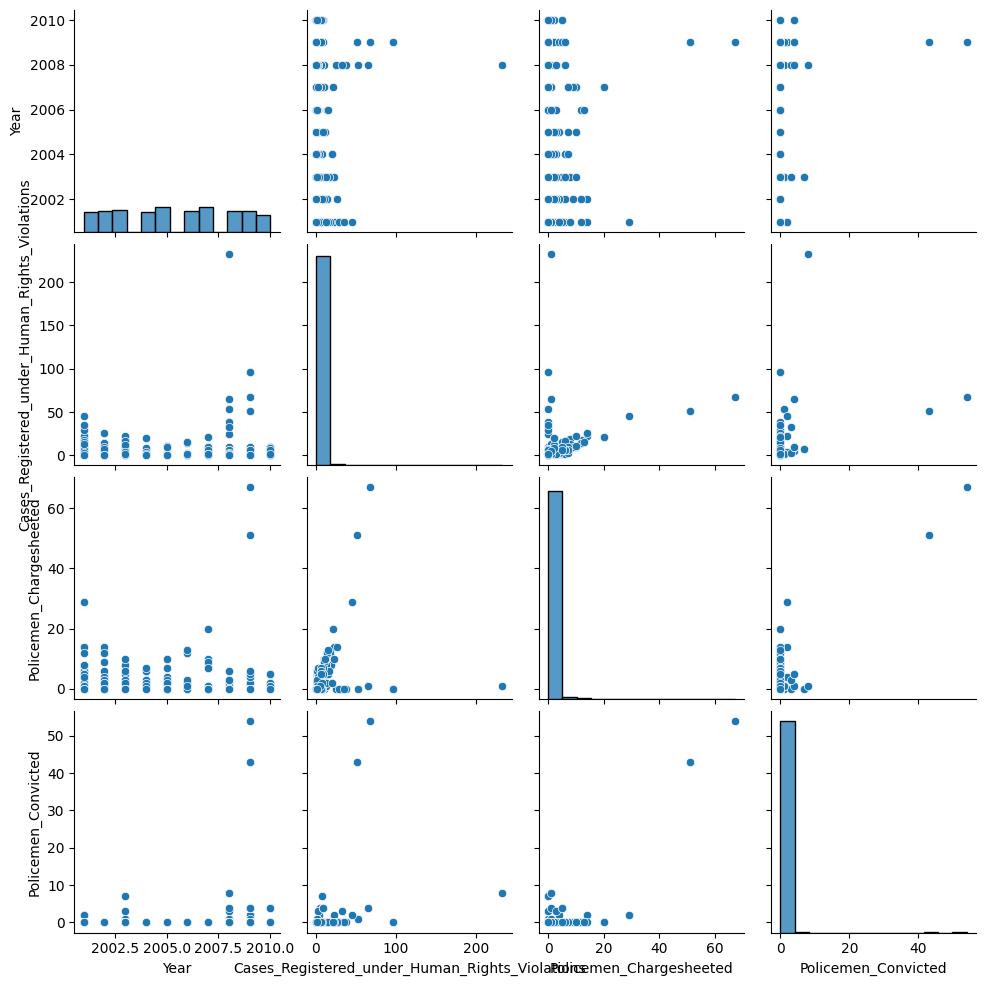

In [45]:
sns.pairplot(df)

<Axes: >

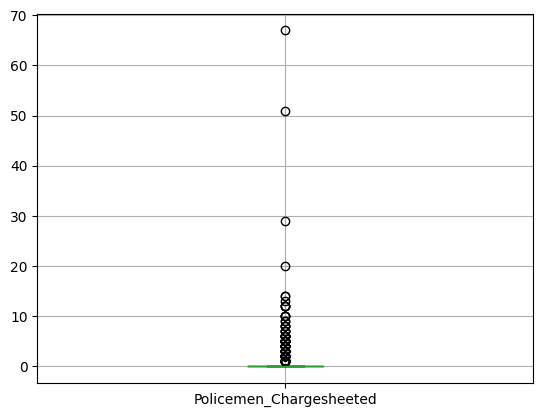

In [46]:
df.boxplot('Policemen_Chargesheeted')